In [2]:
# Dependencies
from bs4 import BeautifulSoup as bs
import requests
from splinter import Browser
import os
import pandas as pd
import time

In [3]:
 executable_path = {'executable_path': 'chromedriver.exe'}
 browser = Browser('chrome', **executable_path, headless=False)

In [4]:
news_url = 'https://mars.nasa.gov/news/'
browser.visit(news_url)

<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><script src="https://bam.nr-data.net/1/5e33925808?a=59562082&amp;v=1130.54e767a&amp;to=JVcPR0MLWApSRU1eAQVVEhxSC1oSUlkWbBMHXwRAHhdcCUA%3D&amp;rst=3246&amp;ref=https://mars.nasa.gov/news/&amp;ap=237&amp;be=1625&amp;fe=3079&amp;dc=2225&amp;af=err,xhr,stn,ins&amp;perf=%7B%22timing%22:%7B%22of%22:1571124983607,%22n%22:0,%22f%22:2,%22dn%22:1040,%22dne%22:1041,%22c%22:1041,%22s%22:1065,%22ce%22:1102,%22rq%22:1103,%22rp%22:1549,%22rpe%22:1799,%22dl%22:1556,%22di%22:2225,%22ds%22:2225,%22de%22:2474,%22dc%22:3079,%22l%22:3079,%22le%22:3084%7D,%22navigation%22:%7B%7D%7D&amp;fp=2172&amp;fcp=2172&amp;jsonp=NREUM.setToken" type="text/javascript"></script><script src="https://js
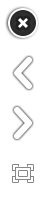
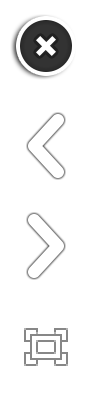
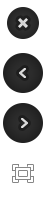
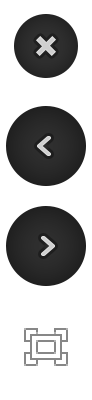
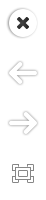
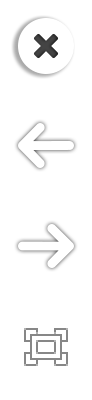
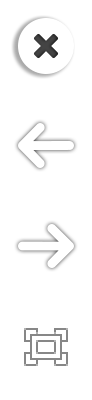
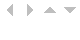

In [5]:
# Create a Beautiful Soup object
news_html = browser.html
news_soup = bs(news_html,'lxml')
print(news_soup)

In [6]:
# Extract title  and paragraph text
news_title = news_soup.find("div",class_="content_title").text
news_para = news_soup.find("div", class_="rollover_description_inner").text
print(f"Title is: {news_title}")
print(f"Paragraph is: {news_para}")

Title is: NASA's Curiosity Rover Finds an Ancient Oasis on Mars
Paragraph is: New evidence suggests salty, shallow ponds once dotted a Martian crater — a sign of the planet's drying climate.


In [7]:
# JPL Mars Space Images - Featured Image
jurl = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(jurl)

In [8]:
jhtml = browser.html
print(jhtml)

jpl_soup = bs(jhtml,"html.parser")
print(jpl_soup)

<html style="" class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-"><!-- START HEADER: "DEFAULT" --><head><script type="text/javascript" src="https://m.addthis.com/live/red_lojson/300lo.json?si=5da577053ec7c0f8&amp;bkl=0&amp;bl=1&amp;pdt=1768&amp;sid=5da577053ec7c0f8&amp;pub=&amp;rev=v8.28.0-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2F%3Fsearch%3D%26category%3DMars&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1571124997679&amp;jsl=1&amp;

In [9]:
image_url = jpl_soup.find('div',class_='carousel_container').article.footer.a['data-fancybox-href']
print(image_url)
base_link = "https:"+jpl_soup.find('div', class_='jpl_logo').a['href'].rstrip('/')
feature_url = base_link+image_url
featured_image_title = jpl_soup.find('h1', class_="media_feature_title").text.strip()
print(f'Featured image title is:{featured_image_title}')
print(f'Featured image url is:{feature_url}')


/spaceimages/images/mediumsize/PIA17462_ip.jpg
Featured image title is:Voyager 1 Entering Interstellar Space (Artist Concept)
Featured image url is:https://www.jpl.nasa.gov/spaceimages/images/mediumsize/PIA17462_ip.jpg


In [10]:
# Mars Weather
turl = 'https://twitter.com/marswxreport?lang=en'
browser.visit(turl)

In [11]:
thtml = browser.html
print(thtml)

tw_soup = bs(thtml,"html.parser")
print(tw_soup)

<html lang="en" data-scribe-reduced-action-queue="true"><head>
    
    
    
    
    
    
    
    <meta charset="utf-8">
      <script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="">
        !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")>-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
      </script>
    
    
  
  <script id="bouncer_terminate_iframe" nonce="">
    if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
    window.ttftData={"transaction_id":"0053efd500e13a75.28da16a19349bc2b\u003c:000d5c8400f7dc26","server_request_start_time":1571125016558,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_a\/1.0.1\/20190918.2229.d168947","ttft_browser":"chrome"};!function(){fu

<html data-scribe-reduced-action-queue="true" lang="en"><head>
<meta charset="utf-8"/>
<script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="">
        !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")>-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
      </script>
<script id="bouncer_terminate_iframe" nonce="">
    if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
<script id="ttft_boot_data" nonce="">
    window.ttftData={"transaction_id":"0053efd500e13a75.28da16a19349bc2b\u003c:000d5c8400f7dc26","server_request_start_time":1571125016558,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_a\/1.0.1\/20190918.2229.d168947","ttft_browser":"chrome"};!function(){function t(t,n){window.ttftData&&!window.ttftData[t]&&(window.t

In [12]:
mars_weather = tw_soup.find("p", class_= "TweetTextSize TweetTextSize--normal js-tweet-text tweet-text").text

#for tweet in tweets:
#    print(tweet.text)
print(f"mars weather :{mars_weather }")

mars weather :InSight sol 313 (2019-10-14) low -101.4ºC (-150.6ºF) high -27.2ºC (-16.9ºF)
winds from the SSE at 5.5 m/s (12.4 mph) gusting to 22.5 m/s (50.3 mph)
pressure at 7.20 hPapic.twitter.com/2moNAouxXa


In [13]:
# mars fact

murl = 'https://space-facts.com/mars/'
#browser.visit(murl)    
    

In [14]:

table = pd.read_html(murl)
table[0]

,Mars - Earth Comparison,Mars,Earth
0,Diameter:,"6,779 km","12,742 km"
1,Mass:,6.39 × 10^23 kg,5.97 × 10^24 kg
2,Moons:,2,1
3,Distance from Sun:,"227,943,824 km","149,598,262 km"
4,Length of Year:,687 Earth days,365.24 days
5,Temperature:,-153 to 20 °C,-88 to 58°C


In [15]:
mars_df = table[0]
mars_df =  mars_df[['Mars - Earth Comparison', 'Mars']]
mars_df

,Mars - Earth Comparison,Mars
0,Diameter:,"6,779 km"
1,Mass:,6.39 × 10^23 kg
2,Moons:,2
3,Distance from Sun:,"227,943,824 km"
4,Length of Year:,687 Earth days
5,Temperature:,-153 to 20 °C


In [16]:
mars_fact_html = mars_df.to_html(header=False, index=False)
mars_fact_html 

'<table border="1" class="dataframe">\n  <tbody>\n    <tr>\n      <td>Diameter:</td>\n      <td>6,779 km</td>\n    </tr>\n    <tr>\n      <td>Mass:</td>\n      <td>6.39 × 10^23 kg</td>\n    </tr>\n    <tr>\n      <td>Moons:</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <td>Distance from Sun:</td>\n      <td>227,943,824 km</td>\n    </tr>\n    <tr>\n      <td>Length of Year:</td>\n      <td>687 Earth days</td>\n    </tr>\n    <tr>\n      <td>Temperature:</td>\n      <td>-153 to 20 °C</td>\n    </tr>\n  </tbody>\n</table>'

In [21]:
# Mars Hemispheres
mhurl = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(mhurl)    


In [22]:
mhtml = browser.html
print(mhtml)

mh_soup = bs(mhtml,"html.parser")
print(mh_soup)

<html lang="en"><head>
		<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.3/themes/smoothness/jquery-ui.css">
<title>Astropedia Search Results | USGS Astrogeology Science Center</title>
		<meta name="description" content="USGS Astrogeology Science Center Astropedia search results.">
		<meta name="keywords" content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping">
		<meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
		<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">
		<meta name="google-site-verification" content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM">
		<!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
		<link rel="stylesheet" media="screen" href="/css/main.css">
		<link rel="stylesheet" media="print" href="/css/print.css">
		<!--[if lt

In [24]:
results = mh_soup.find_all("div",class_='item')
hemisphere_image_urls = []
for result in results:
        product_dict = {}
        titles = result.find('h3').text
        end_link = result.find("a")["href"]
        image_link = "https://astrogeology.usgs.gov/" + end_link    
        browser.visit(image_link)
        html = browser.html
        soup= bs(html, "html.parser")
        downloads = soup.find("div", class_="downloads")
        image_url = downloads.find("a")["href"]
        print(titles)
        print(image_url)
        product_dict['title']= titles
        product_dict['image_url']= image_url
        hemisphere_image_urls.append(product_dict)
        
        

Cerberus Hemisphere Enhanced
http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg
Schiaparelli Hemisphere Enhanced
http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg
Syrtis Major Hemisphere Enhanced
http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg
Valles Marineris Hemisphere Enhanced
http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg


In [25]:
hemisphere_image_urls

[{'title': 'Cerberus Hemisphere Enhanced',
  'image_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg'},
 {'title': 'Schiaparelli Hemisphere Enhanced',
  'image_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg'},
 {'title': 'Syrtis Major Hemisphere Enhanced',
  'image_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg'},
 {'title': 'Valles Marineris Hemisphere Enhanced',
  'image_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg'}]